In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.tsa.stattools as st
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import acf, pacf, graphics
sns.mpl.rc('figure',figsize=(16, 6))

In [2]:
unrate = pd.read_csv(r'C:\Users\zoe_x\Documents\python\homework\chapter2\2.3\UNRATE0903.csv')

In [3]:
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [4]:
date = unrate['DATE']

In [5]:
unrate.index=date

In [7]:
unrate = unrate.drop(['DATE'],axis=1)

In [8]:
unrate.head()

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


# 1948年1月-2009年3月的数据作图如下

Text(0,0.5,'rate')

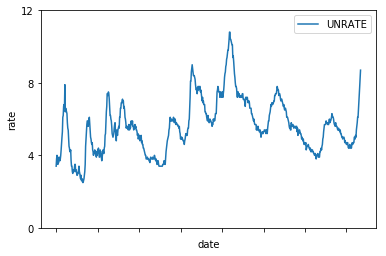

In [9]:
unrate.plot(yticks=range(0,16,4))
plt.xlabel('date')
plt.ylabel('rate')

# 做出ACF、PACF的图

In [10]:
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图

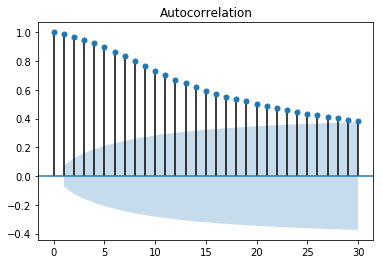

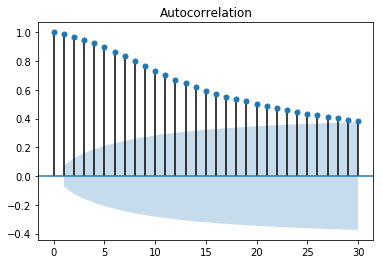

In [11]:
plot_acf(unrate,lags=30)

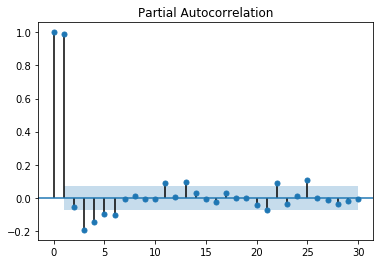

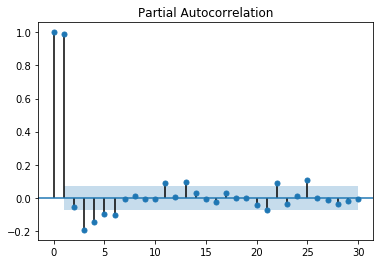

In [13]:
plot_pacf(unrate,lags=30)

# 白噪声检验

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [15]:
acorr_ljungbox(unrate)

(array([  716.41852207,  1410.79439877,  2076.51093579,  2708.98530991,
         3304.95042478,  3861.09470371,  4377.48822085,  4854.76114517,
         5293.56397296,  5695.25012265,  6063.91730653,  6401.45519211,
         6712.56199333,  6999.97167434,  7266.09662197,  7513.09462362,
         7743.72538365,  7959.84686514,  8163.14960737,  8354.28472236,
         8533.29009773,  8702.84905731,  8862.4781924 ,  9013.17319572,
         9156.8644549 ,  9293.76792899,  9424.50517035,  9548.96515076,
         9667.30428542,  9779.98479076,  9886.85917939,  9987.78210985,
        10083.21437496, 10173.61457275, 10258.98774755, 10340.02221192,
        10417.1936391 , 10490.80469584, 10561.24568509, 10628.69553602]),
 array([8.04353809e-158, 4.46569191e-307, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.000000

In [16]:
# 不满足白噪声假设，因此构建线性时间序列模型

# 模型拟合

In [17]:
AR(unrate).select_order(maxlag=13,ic='aic')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


11

In [18]:
# 构建AR（11）模型

In [19]:
model_ar = AR(unrate).fit(maxlag=12,method='mle',ic='aic')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [20]:
model_ar.params #拟合系数

const         0.088931
L1.UNRATE     0.996399
L2.UNRATE     0.231133
L3.UNRATE    -0.078170
L4.UNRATE    -0.068064
L5.UNRATE     0.040636
L6.UNRATE    -0.128762
L7.UNRATE    -0.045042
L8.UNRATE     0.057259
L9.UNRATE    -0.021575
L10.UNRATE   -0.122472
L11.UNRATE    0.122959
dtype: float64

In [23]:
model_ar.pvalues #拟合结果的p值

const          2.908681e-03
L1.UNRATE     4.498524e-162
L2.UNRATE      8.195274e-06
L3.UNRATE      1.372905e-01
L4.UNRATE      1.958501e-01
L5.UNRATE      4.416670e-01
L6.UNRATE      1.435070e-02
L7.UNRATE      3.938755e-01
L8.UNRATE      2.787493e-01
L9.UNRATE      6.829133e-01
L10.UNRATE     1.850391e-02
L11.UNRATE     9.488550e-04
dtype: float64

In [24]:
model_ar.sigma2

0.038721912285990645

# 模型检测

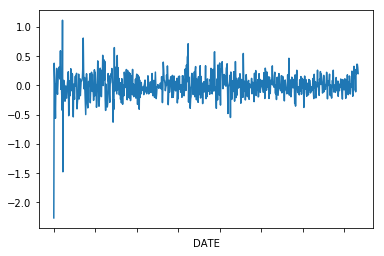

In [28]:
model_ar.resid.plot()

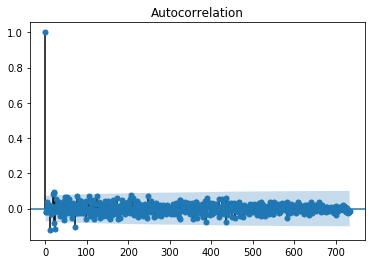

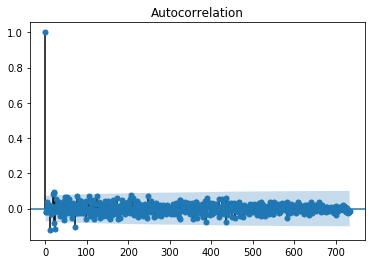

In [29]:
plot_acf(model_ar.resid)

In [26]:
acorr_ljungbox(model_ar.resid)

(array([ 0.32279521,  0.62698285,  0.79702233,  1.98269908,  1.98403412,
         1.98534473,  2.08182073,  2.13289156,  2.42027189,  2.63274042,
         2.66240571, 13.59970255, 14.40021538, 15.02392759, 15.15745034,
        15.63537374, 15.69977675, 15.71735928, 21.07810764, 26.92947614,
        32.29366265, 39.28244253, 39.61742357, 49.50757186, 49.68233616,
        49.7253704 , 52.14013817, 52.45111078, 52.57880295, 53.25667627,
        53.37004847, 53.38723187, 53.42179787, 54.42371937, 55.91595545,
        56.23614297, 56.54746529, 56.92051588, 56.92748199, 56.93451189]),
 array([0.56993265, 0.73089065, 0.85017912, 0.73894117, 0.85134978,
        0.9210415 , 0.95517318, 0.97666434, 0.98295129, 0.98879697,
        0.99447771, 0.3269972 , 0.3462746 , 0.37652098, 0.44013637,
        0.4786856 , 0.54520888, 0.61226548, 0.33250114, 0.13725982,
        0.05466008, 0.01309608, 0.01695725, 0.00163492, 0.00233178,
        0.00339008, 0.00255213, 0.00340181, 0.00469519, 0.00555708,
      

In [27]:
# 残差接近白噪声序列，模型充分

# 计算周期

In [30]:
model_ar.roots  

array([-1.17513664-0.38058599j, -1.17513664+0.38058599j,
       -0.77221494-0.93241166j, -0.77221494+0.93241166j,
        0.02743305-1.2366702j ,  0.02743305+1.2366702j ,
        0.76096029-1.06485002j,  0.76096029+1.06485002j,
        1.1389026 -0.20487507j,  1.1389026 +0.20487507j,
        1.03614982-0.j        ])

In [31]:
# 举例说明对周期的计算，比如取单位根0.76096029+-1.06485002j

In [32]:
a = 0.76096029
b = 1.0648500

In [33]:
import math

In [34]:
k = 2 * math.pi/ (math.acos(a/(math.sqrt(a*a+b*b))))

In [35]:
k #计算出的周期结果如下

6.6116015696816826

# 进行预测

In [36]:
model_ar.predict(start='2009-04-01', end='2009-07-01') #预测结果如下

2009-04-01    8.936308
2009-05-01    9.148399
2009-06-01    9.302222
2009-07-01    9.437667
Freq: MS, dtype: float64